# NAME: SHARAD ROTHE
## Task-4: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
## Problem Statement:
### As a security/defense analyst, try to find out the hot zone of terrorism.

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [6]:
df = pd.read_csv('globalterrorismdb_0718dist1.csv')

In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Columns: 135 entries, eventid to related
dtypes: float64(69), int64(9), object(57)
memory usage: 35.6+ MB


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.456000e+04,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,32674.000000,3.267400e+04,34560.000000,...,5.210000e+02,1.0,1.140000e+02,2.0,921.00000,702.000000,34559.000000,34559.000000,34559.000000,34559.00000
mean,1.981722e+11,1981.660156,6.230613,15.244097,0.016725,156.960822,5.114525,18.526164,-2.668380e+03,1.400203,...,3.387307e+06,20000.0,1.088357e+06,0.0,2.94354,9.797721,-3.164241,-3.120490,0.163546,-2.37831
std,4.389625e+08,4.392053,3.390694,8.845080,0.128239,145.373191,3.185084,25.496386,4.767985e+05,1.091303,...,4.420520e+07,NaN,4.294602e+06,0.0,1.35577,34.949347,4.381167,4.437098,0.784855,4.32236
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.00000,-99.000000,-9.000000,-9.000000,-9.000000,-9.00000
25%,1.979060e+11,1979.000000,3.000000,8.000000,0.000000,61.000000,2.000000,5.276657,-7.817352e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.00000,1.000000,-9.000000,-9.000000,0.000000,-9.00000
50%,1.982100e+11,1982.000000,6.000000,15.000000,0.000000,110.000000,3.000000,14.622869,-6.606113e+01,1.000000,...,0.000000e+00,20000.0,3.150000e+04,0.0,2.00000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.985080e+11,1985.000000,9.000000,23.000000,0.000000,185.000000,8.000000,40.840097,1.108048e+01,1.000000,...,4.350000e+05,20000.0,5.000000e+05,0.0,4.00000,2.000000,0.000000,0.000000,0.000000,1.00000
max,1.988050e+11,1988.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.784419e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.00000,390.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [12]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [13]:
df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [14]:
df['Country'].value_counts().head()

El Salvador       3980
Peru              3385
United Kingdom    2662
Colombia          2657
Spain             2000
Name: Country, dtype: int64

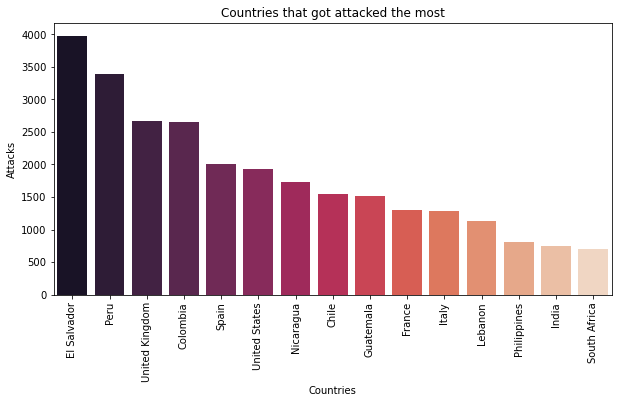

In [15]:
df['Country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=df['Country'].value_counts()[:15].index,y=df['Country'].value_counts().values[:15], palette = 'rocket')
plt.title('Countries that got attacked the most')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Attacks')
plt.show()

## Top Regions Affected by Terrorist Attacks

In [16]:
df['Region'].value_counts().head()

South America                  8716
Western Europe                 8711
Central America & Caribbean    7630
Middle East & North Africa     3367
North America                  2088
Name: Region, dtype: int64

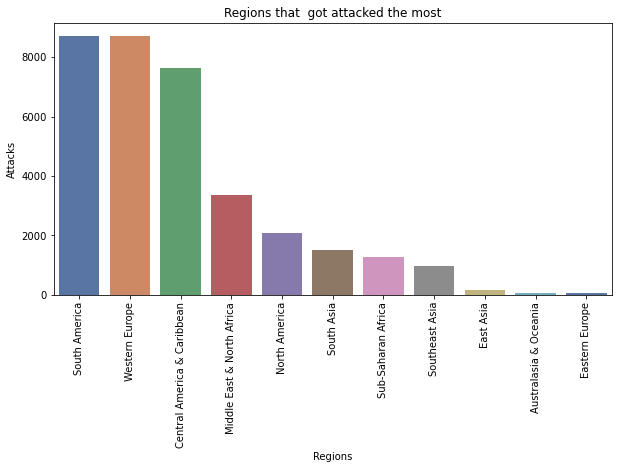

In [17]:
df['Region'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=df['Region'].value_counts()[:14].index,y=df['Region'].value_counts().values[:14], palette = 'deep')
plt.title('Regions that  got attacked the most')
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Attacks')
plt.show()

## Top Cities Affected by Terrorist Attacks

In [18]:
df['city'].value_counts().head()

Unknown         2172
Lima            1240
Belfast         1187
San Salvador    1174
Santiago        1042
Name: city, dtype: int64

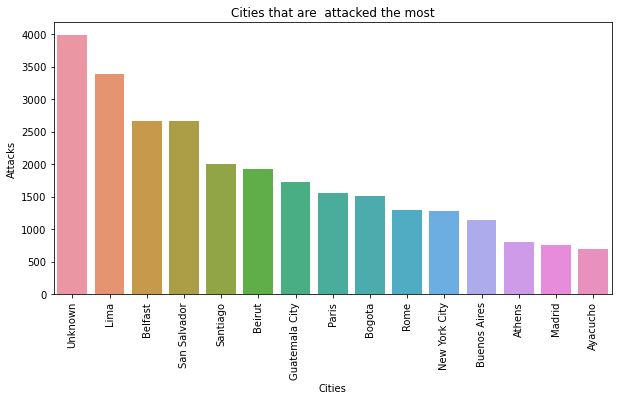

In [19]:
df['city'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=df['city'].value_counts()[:15].index,y=df['Country'].value_counts().values[:15])
plt.title('Cities that are  attacked the most')
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Attacks')
plt.show()

## Terrorist Attacks Over the Years

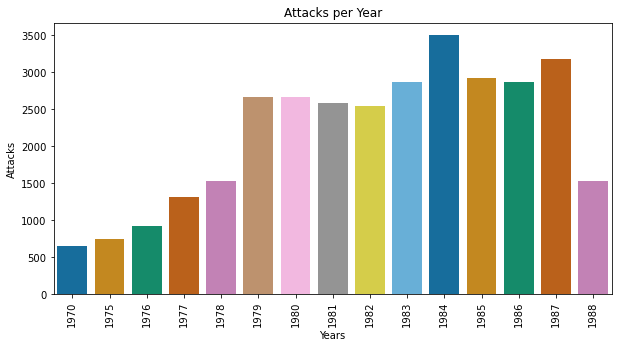

In [20]:
df['Year'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=df['Year'].value_counts()[:15].index,y=df['Year'].value_counts().values[:15], palette = 'colorblind')
plt.title('Attacks per Year')
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Attacks')
plt.show()

## Type of Attacks by Terrorists

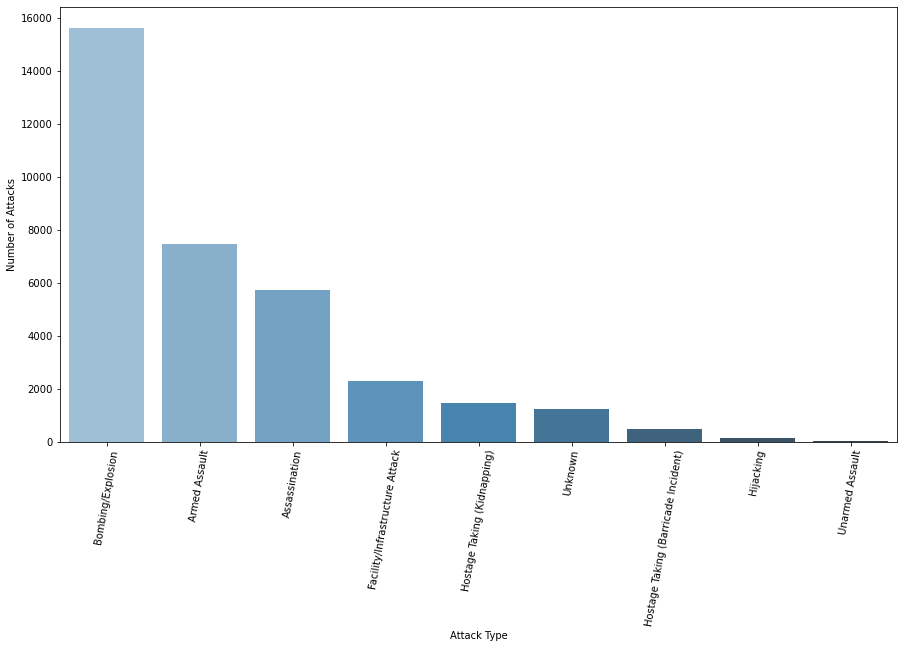

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['AttackType'],order=df['AttackType'].value_counts().index,palette='Blues_d')
plt.xticks(rotation=80)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

## Groups hosting terror attacks 

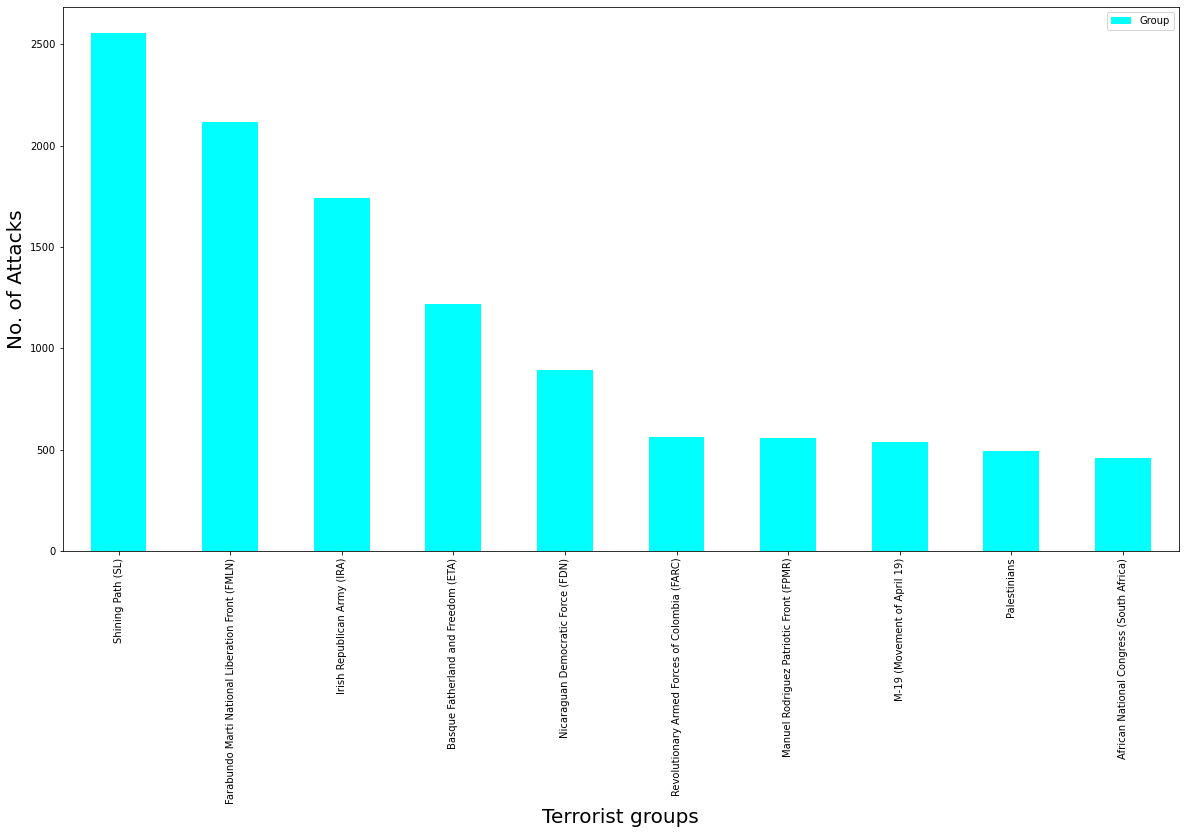

In [22]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='cyan',figsize=(20,10))
plt.xlabel("Terrorist groups",fontsize=20)
plt.ylabel("No. of Attacks",fontsize=20)
plt.show()

## Properties Affected by Terrorist Attacks 

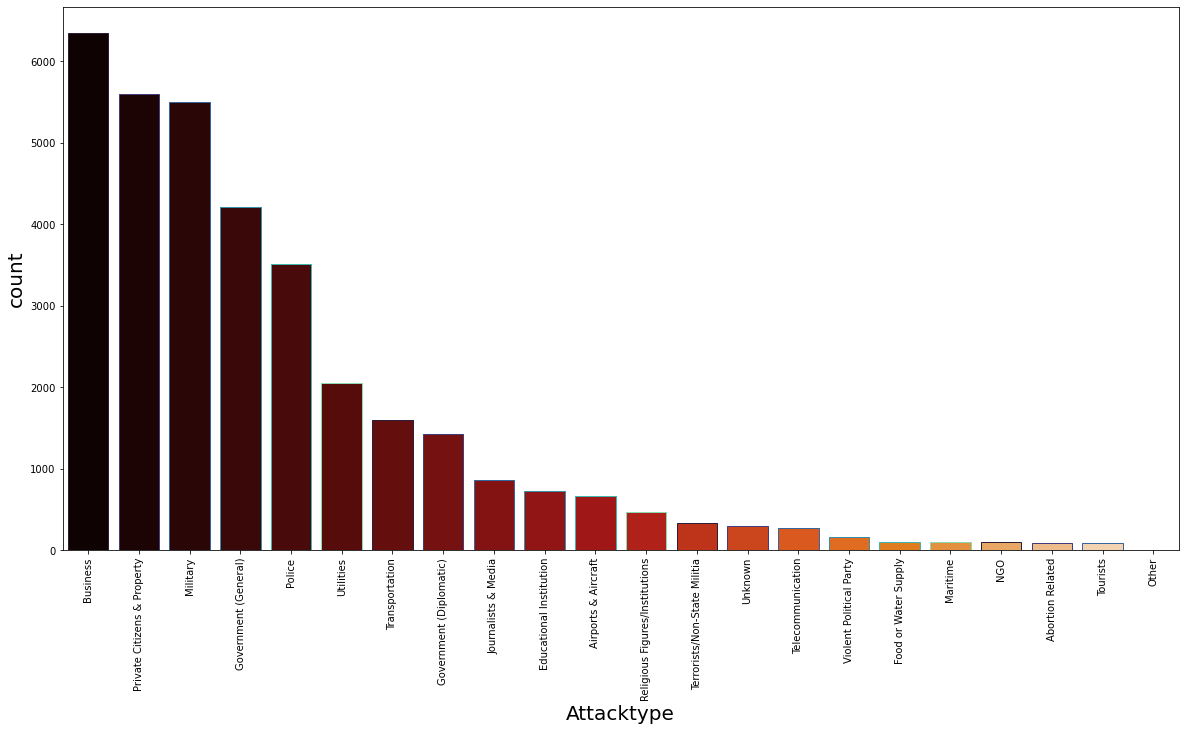

In [23]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Target_type"],order=df['Target_type'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

## Weapons Used for Terrorist Attacks

(array([], dtype=float64), [])

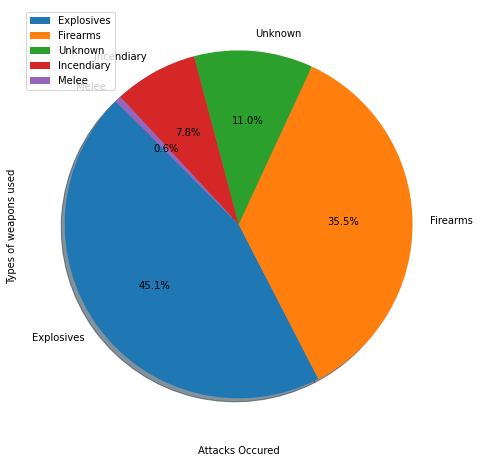

In [24]:
df['Weapon_type'].value_counts().head() 
df['Weapon_type'].value_counts().head().plot(kind = 'pie', figsize = (18,8), fontsize=10, autopct= '%3.1f%%',shadow=True, startangle=135, legend=True, )
plt.ylabel("Types of weapons used ", size = 10)
plt.xlabel("Attacks Occured", size = 10)
plt.xticks(size = 15)
plt.yticks(size = 15)